In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

g_df = pd.read_csv('../data/testglobalsystem2_res_std.csv', index_col=0)
print(g_df.shape, g_df)

(96732, 857)               CHP.fluid.h  E_amb_TES  E_el_buy  G.CO2_air.CO2  G.CO2_top.CO2  \
time                                                                           
0.000000e+00     1.000000   0.778743  0.000000       1.000000       1.000000   
5.947130e+01     0.065901   0.778743  0.000000       0.614634       0.625397   
6.000000e+01     0.065867   0.778743  0.000000       0.612433       0.623069   
2.400000e+02     0.079046   0.778736  0.000000       0.253675       0.258400   
3.000000e+02     0.083526   0.778714  0.000000       0.216266       0.219703   
...                   ...        ...       ...            ...            ...   
1.787256e+08     0.030695   0.176859  0.999973       0.115536       0.116624   
1.787292e+08     0.030689   0.176859  0.999973       0.093119       0.094299   
1.787328e+08     0.030683   0.176859  0.999973       0.097174       0.098391   
1.787345e+08     0.030681   0.176859  0.999979       0.089248       0.089791   
1.787364e+08     0.030678  

In [2]:
LR = 0.001
EPOCHS = 500
BATCH_SIZE = 1_000
latent_dim = 50
data = g_df[['G.E_el_tot','G.E_th_tot','G.E_el_I','G.E_th_I','G.air.T','G.air_Top.T','G.sky.T','G.canopy.T','G.cover.T']]

In [18]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        
        epsilon = tf.keras.backend.random_normal(shape=(batch,dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
# Encoder
encoder_inputs = layers.Input(shape=(data.shape[1],))
x = layers.Dense(64,activation='relu')(encoder_inputs)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(latent_inputs)
decoder_outputs = layers.Dense(data.shape[1], activation='sigmoid')(x)
decoder = models.Model(latent_inputs, decoder_outputs, name='decoder')

# VAE
vae_outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, vae_outputs, name='vae')


kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
vae.add_loss(kl_loss)

optimizer = keras.optimizers.Adam(learning_rate=LR)
vae.compile(optimizer=optimizer, loss='mean_squared_error')

vae.fit(data, data, epochs = EPOCHS, batch_size = BATCH_SIZE)

Epoch 1/500
97/97 [==============================] - 1s 3ms/step - loss: 0.0638
Epoch 2/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0462
Epoch 3/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0444
Epoch 4/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0436
Epoch 5/500
97/97 [==============================] - 0s 3ms/step - loss: 0.0431
Epoch 6/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0429
Epoch 7/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0427
Epoch 8/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 9/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0424
Epoch 10/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0422
Epoch 11/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0422
Epoch 12/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0419
Epoch 13/500
97/97 [=================

97/97 [==============================] - 0s 3ms/step - loss: 0.0399
Epoch 203/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 204/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 205/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 206/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 207/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 208/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 209/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 210/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 211/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 212/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 213/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 214/500
97/97 [=========

97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 303/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 304/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 305/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 306/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 307/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 308/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 309/500
97/97 [==============================] - 0s 3ms/step - loss: 0.0400
Epoch 310/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 311/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 312/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 313/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 314/500
97/97 [=========

97/97 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 403/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 404/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 405/500
97/97 [==============================] - 0s 3ms/step - loss: 0.0399
Epoch 406/500
97/97 [==============================] - 0s 3ms/step - loss: 0.0399
Epoch 407/500
97/97 [==============================] - 0s 3ms/step - loss: 0.0399
Epoch 408/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 409/500
97/97 [==============================] - 0s 3ms/step - loss: 0.0400
Epoch 410/500
97/97 [==============================] - 0s 3ms/step - loss: 0.0399
Epoch 411/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 412/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 413/500
97/97 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 414/500
97/97 [=========

In [19]:
# Generate new data

num_samples = 200_000
synthetic_data = decoder.predict(tf.random.normal(shape=(num_samples,latent_dim)))

6250/6250 [==============================] - 4s 703us/step


In [2]:
#reshaped_data = tf.squeeze(synthetic_data, axis=1)
new_data = pd.DataFrame(synthetic_data, columns=data.columns)

NameError: name 'pd' is not defined

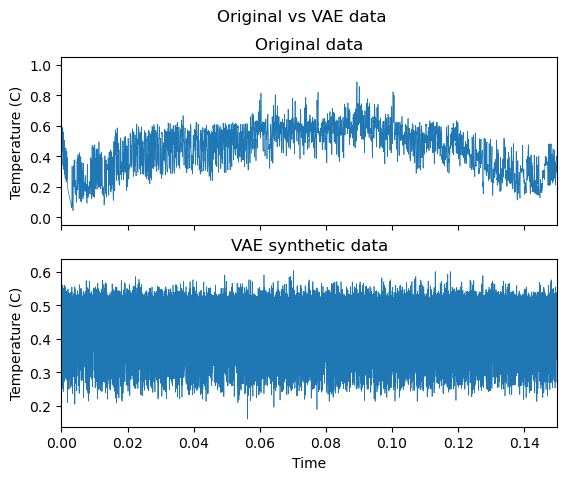

In [31]:
fig, axes = plt.subplots(2, sharex=True)

fig.suptitle('Original vs VAE data')

xs_normalised = np.linspace(0,1,len(data))
xs_new        = np.linspace(0,1,len(new_data))

axes[0].plot(xs_normalised, data.loc[:, 'G.air.T'], linewidth=0.5)
axes[1].plot(xs_new, new_data.loc[:, 'G.air.T'], linewidth=0.5)

axes[0].set_xlim([0,0.15])
axes[1].set_xlim([0,0.15])

axes[0].set_ylabel('Temperature (C)')
axes[0].set_title('Original data')
axes[1].set_ylabel('Temperature (C)')
axes[1].set_title('VAE synthetic data')
axes[-1].set_xlabel('Time')

plt.savefig('../imgs/vae_synth_data0_compared.png')#plt.show()

(0.0, 8000.0)

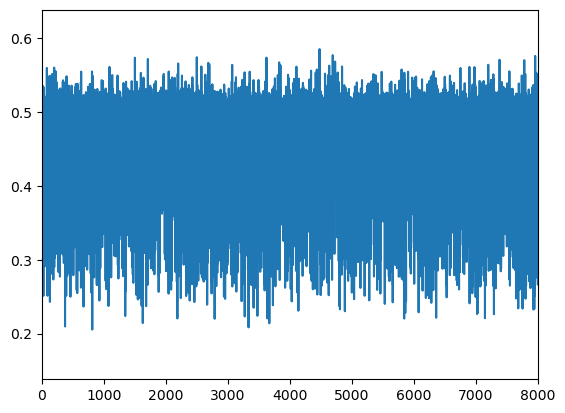

In [27]:
plt.plot(new_data['G.air.T'])
plt.xlim([0,8000])

In [4]:
seq_len = int(24*365.25)
def create_sequences(data, sequence_length=seq_len, step=seq_len):
    sequences = []
    total_sequences = (len(data) - sequence_length) // step+1
    for i in range(0, total_sequences):
        sequence = data.iloc[i*step: (i*step) + sequence_length]
        sequences.append(sequence)
    
    return np.array(sequences)

reshaped_df = create_sequences(data)
print(reshaped_df.shape)

(11, 8766, 9)


In [5]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        
        epsilon = tf.keras.backend.random_normal(shape=(batch,dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
sequence_len = seq_len
num_features = len(data.columns)

# Encoder
encoder_inputs = layers.Input(shape=(sequence_len, num_features))
x = layers.Conv1D(32, 3, activation = 'relu')(encoder_inputs)
x = layers.Conv1D(64, 3, activation = 'relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64,activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(223*64, activation='relu')(latent_inputs)
x = layers.Reshape((223,64))(x)

x = layers.Conv1D(64, 3, activation='relu')(x)
x = layers.UpSampling1D(2)(x)
x = layers.Conv1D(32, 3, activation='relu')(x)
x = layers.UpSampling1D(2)(x)
x = layers.Conv1D(32, 3, activation='relu')(x)
x = layers.UpSampling1D(10)(x)
x = layers.Cropping1D(cropping=(6,6))(x)
decoder_outputs = layers.Conv1D(9,3, activation='sigmoid')(x)
decoder = models.Model(latent_inputs, decoder_outputs, name='decoder')

# VAE
vae_outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, vae_outputs, name='vae')
vae.summary()

2024-02-17 17:25:41.613491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 17:25:41.613627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 17:25:41.762894: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-17 17:25:42.214355: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-17 17:25:47.510984: W tensorflow/compiler/tf2

Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8766, 9)]         0         
                                                                 
 encoder (Functional)        [(None, 50),              35902820  
                              (None, 50),                        
                              (None, 50)]                        
                                                                 
 decoder (Functional)        (None, 8766, 9)           750377    
                                                                 
Total params: 36653197 (139.82 MB)
Trainable params: 36653197 (139.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
vae.add_loss(kl_loss)

optimizer = keras.optimizers.Adam(learning_rate=LR)
vae.compile(optimizer=optimizer, loss='mean_squared_error')

vae.fit(reshaped_df, reshaped_df, epochs = EPOCHS, batch_size = BATCH_SIZE)

Epoch 1/500
1/1 [==============================] - 45s 45s/step - loss: 0.0969
Epoch 2/500
1/1 [==============================] - 1s 598ms/step - loss: 25499743027200.0000
Epoch 3/500
1/1 [==============================] - 1s 610ms/step - loss: 9143934976.0000
Epoch 4/500
1/1 [==============================] - 1s 612ms/step - loss: 343370253729792.0000
Epoch 5/500
1/1 [==============================] - 1s 611ms/step - loss: 21327962112.0000
Epoch 6/500
1/1 [==============================] - 1s 607ms/step - loss: 270221248.0000
Epoch 7/500
1/1 [==============================] - 1s 610ms/step - loss: 3657029.5000
Epoch 8/500
1/1 [==============================] - 1s 613ms/step - loss: 4717493.5000
Epoch 9/500
1/1 [==============================] - 1s 613ms/step - loss: 1513943.5000
Epoch 10/500
1/1 [==============================] - 1s 608ms/step - loss: 1425341.3750
Epoch 11/500
1/1 [==============================] - 1s 613ms/step - loss: 2642254.2500
Epoch 12/500
1/1 [=================

1/1 [==============================] - 1s 621ms/step - loss: 0.7631
Epoch 199/500
1/1 [==============================] - 1s 646ms/step - loss: 0.7618
Epoch 200/500
1/1 [==============================] - 1s 639ms/step - loss: 0.7612
Epoch 201/500
1/1 [==============================] - 1s 638ms/step - loss: 0.7563
Epoch 202/500
1/1 [==============================] - 1s 629ms/step - loss: 0.7597
Epoch 203/500
1/1 [==============================] - 1s 608ms/step - loss: 0.7608
Epoch 204/500
1/1 [==============================] - 1s 628ms/step - loss: 0.7578
Epoch 205/500
1/1 [==============================] - 1s 615ms/step - loss: 0.7568
Epoch 206/500
1/1 [==============================] - 1s 621ms/step - loss: 0.7584
Epoch 207/500
1/1 [==============================] - 1s 616ms/step - loss: 0.7585
Epoch 208/500
1/1 [==============================] - 1s 605ms/step - loss: 0.7580
Epoch 209/500
1/1 [==============================] - 1s 636ms/step - loss: 0.7573
Epoch 210/500
1/1 [===========

1/1 [==============================] - 1s 635ms/step - loss: 0.7404
Epoch 299/500
1/1 [==============================] - 1s 627ms/step - loss: 0.7400
Epoch 300/500
1/1 [==============================] - 1s 628ms/step - loss: 0.7413
Epoch 301/500
1/1 [==============================] - 1s 638ms/step - loss: 0.7384
Epoch 302/500
1/1 [==============================] - 1s 638ms/step - loss: 0.7389
Epoch 303/500
1/1 [==============================] - 1s 643ms/step - loss: 0.7370
Epoch 304/500
1/1 [==============================] - 1s 618ms/step - loss: 0.7400
Epoch 305/500
1/1 [==============================] - 1s 621ms/step - loss: 0.7367
Epoch 306/500
1/1 [==============================] - 1s 640ms/step - loss: 0.7366
Epoch 307/500
1/1 [==============================] - 1s 617ms/step - loss: 0.7424
Epoch 308/500
1/1 [==============================] - 1s 614ms/step - loss: 0.7382
Epoch 309/500
1/1 [==============================] - 1s 614ms/step - loss: 0.7370
Epoch 310/500
1/1 [===========

1/1 [==============================] - 1s 653ms/step - loss: 0.7198
Epoch 399/500
1/1 [==============================] - 1s 637ms/step - loss: 0.7199
Epoch 400/500
1/1 [==============================] - 1s 657ms/step - loss: 0.7185
Epoch 401/500
1/1 [==============================] - 1s 637ms/step - loss: 0.7197
Epoch 402/500
1/1 [==============================] - 1s 643ms/step - loss: 0.7175
Epoch 403/500
1/1 [==============================] - 1s 648ms/step - loss: 0.7225
Epoch 404/500
1/1 [==============================] - 1s 635ms/step - loss: 0.7166
Epoch 405/500
1/1 [==============================] - 1s 629ms/step - loss: 0.7164
Epoch 406/500
1/1 [==============================] - 1s 610ms/step - loss: 0.7149
Epoch 407/500
1/1 [==============================] - 1s 626ms/step - loss: 0.7212
Epoch 408/500
1/1 [==============================] - 1s 625ms/step - loss: 0.7223
Epoch 409/500
1/1 [==============================] - 1s 617ms/step - loss: 0.7158
Epoch 410/500
1/1 [===========

1/1 [==============================] - 1s 630ms/step - loss: 0.6936
Epoch 499/500
1/1 [==============================] - 1s 638ms/step - loss: 0.6970
Epoch 500/500
1/1 [==============================] - 1s 623ms/step - loss: 0.6928


In [7]:
num_samples = 1_000
synthetic_data = decoder.predict(tf.random.normal(shape=(num_samples,latent_dim)))

32/32 [==============================] - 2s 28ms/step


In [8]:
print(synthetic_data.shape)

(1000, 8766, 9)


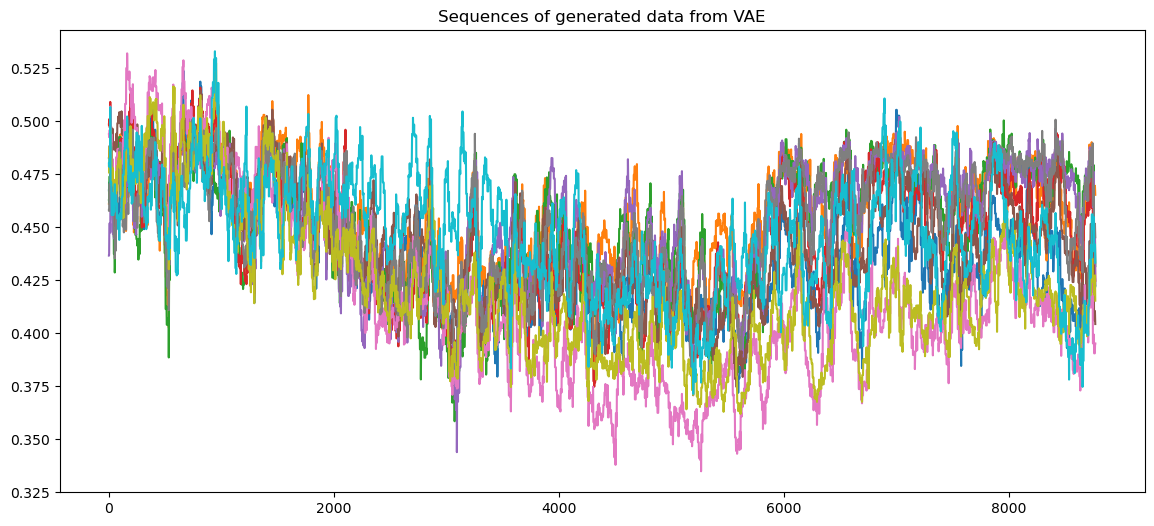

In [10]:
feature_index = 4 # G.air.T

plt.figure(figsize=(14,6))
for i in range(10):
    plt.plot(synthetic_data[i, :, feature_index], label=f'Sequence {i+1}')
    
plt.title('Sequences of generated data from VAE')
plt.savefig('../imgs/vae_synth_data1.png')#plt.show()

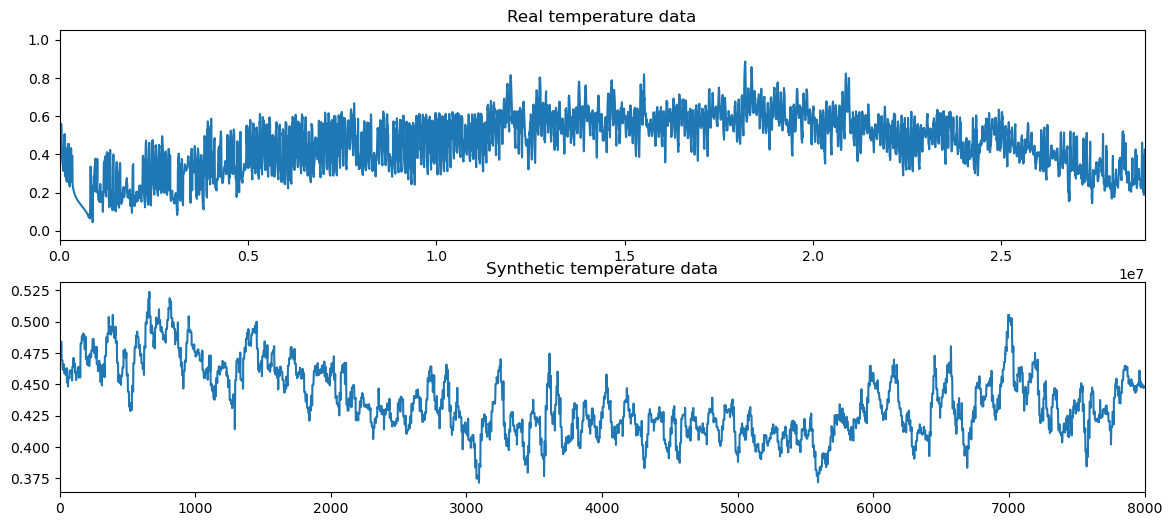

In [17]:
fig, axs = plt.subplots(2,figsize=(14,6))
axs[0].plot(data[['G.air.T']])
axs[0].set_xlim([0,8000*3600])
axs[0].set_title('Real temperature data')

axs[1].plot(synthetic_data[0,:,4])
axs[1].set_xlim([0,8000])
axs[1].set_title('Synthetic temperature data')
plt.savefig('../imgs/vae_synth_data1_compared.png') #plt.show()

In [ ]:
fig, axs = plt.subplots(2,figsize=(14,6))
axs[0].plot(data[['G.E_el_I']])
axs[0].set_xlim([0,8000*3600])
axs[0].set_title('Real temperature data')

axs[1].plot(synthetic_data[0,:,4])
axs[1].set_xlim([0,8000])
axs[1].set_title('Synthetic temperature data')
plt.show()

Implement a LSTM layer

In [17]:
LR = 0.001
EPOCHS = 1_000
BATCH_SIZE = 1_000
latent_dim = 50
timesteps = 1
features = 9
data = g_df[['G.E_el_tot','G.E_th_tot','G.E_el_I','G.E_th_I','G.air.T','G.air_Top.T','G.sky.T','G.canopy.T','G.cover.T']]

In [19]:
data = np.expand_dims(data, axis=1)

import tensorflow as tf
from tensorflow.keras import layers, models

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Encoder
encoder_inputs = layers.Input(shape=(timesteps, features)) 
x = layers.LSTM(64, activation='relu')(encoder_inputs) 
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = layers.Input(shape=(latent_dim,))

x = layers.RepeatVector(timesteps)(latent_inputs) 
x = layers.LSTM(64, activation='relu', return_sequences=True)(x) 
decoder_outputs = layers.TimeDistributed(layers.Dense(features, activation='sigmoid'))(x) 
decoder = models.Model(latent_inputs, decoder_outputs, name='decoder')

# VAE
vae_outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, vae_outputs, name='vae')

kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
vae.add_loss(kl_loss)
optimizer = tf.keras.optimizers.Adam(learning_rate=LR)  # Use tf.keras.optimizers.Adam
vae.compile(optimizer=optimizer, loss='mean_squared_error')

vae.fit(data, data, epochs=EPOCHS, batch_size=BATCH_SIZE)


Epoch 1/2000
97/97 [==============================] - 3s 10ms/step - loss: 0.0519
Epoch 2/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0347
Epoch 3/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0300
Epoch 4/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0292
Epoch 5/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0290
Epoch 6/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0288
Epoch 7/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0286
Epoch 8/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0285
Epoch 9/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0284
Epoch 10/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0284
Epoch 11/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0283
Epoch 12/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0282
Epoch 13/2000

97/97 [==============================] - 1s 10ms/step - loss: 0.0202
Epoch 197/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0201
Epoch 198/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0201
Epoch 199/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0202
Epoch 200/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0201
Epoch 201/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0202
Epoch 202/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0202
Epoch 203/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0201
Epoch 204/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0201
Epoch 205/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0201
Epoch 206/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0202
Epoch 207/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0201
Epoch 2

97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 391/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0201
Epoch 392/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 393/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 394/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 395/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0201
Epoch 396/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 397/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 398/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0201
Epoch 399/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 400/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 401/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 4

97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 585/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 586/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 587/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 588/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 589/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 590/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 591/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 592/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 593/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 594/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 595/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 5

97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 779/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 780/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 781/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 782/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 783/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 784/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 785/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 786/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 787/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 788/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 789/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 7

97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 973/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 974/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 975/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 976/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 977/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 978/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 979/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 980/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 981/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 982/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 983/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 9

97/97 [==============================] - 1s 10ms/step - loss: 0.0199
Epoch 1165/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 1166/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0199
Epoch 1167/2000
97/97 [==============================] - 1s 12ms/step - loss: 0.0200
Epoch 1168/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1169/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1170/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 1171/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1172/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1173/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1174/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1175/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0

97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1357/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1358/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 1359/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 1360/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1361/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1362/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1363/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1364/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1365/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1366/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1367/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0

97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1549/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1550/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1551/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0199
Epoch 1552/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 1553/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 1554/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 1555/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1556/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1557/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1558/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0199
Epoch 1559/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0

97/97 [==============================] - 1s 10ms/step - loss: 0.0199
Epoch 1741/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1742/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0199
Epoch 1743/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1744/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1745/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 1746/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 1747/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1748/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1749/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0199
Epoch 1750/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1751/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0

97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1933/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1934/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0199
Epoch 1935/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 1936/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1937/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1938/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1939/2000
97/97 [==============================] - 1s 11ms/step - loss: 0.0200
Epoch 1940/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1941/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1942/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0200
Epoch 1943/2000
97/97 [==============================] - 1s 10ms/step - loss: 0.0

In [34]:
np.savez('timeVAE-main/datasets/test.npz', data=g_data[['G.air.T','G.E_el_I']])

In [32]:
x = np.load('test.npz')
x['E_el_I']

array([0.        , 0.        , 0.        , ..., 0.        , 0.11714154,
       0.38285285])

Testing basic VAE implementation adapted from [this repo](https://github.com/keras-team/keras-io/blob/master/examples/generative/vae.py)

Test adding LSTM


In [2]:
timesteps = 1000
latent_dim = 50
data = g_df[['G.E_el_tot','G.E_th_tot','G.E_el_I','G.E_th_I','G.air.T','G.air_Top.T','G.sky.T','G.canopy.T','G.cover.T']]

In [33]:
from tensorflow.keras.layers import Input, LSTM, Dense, Lambda, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

input_dim = 9

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(64)(inputs)

z_mean = Dense(latent_dim)(encoded)
z_log_var = Dense(latent_dim)(encoded)

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

decoder_input = Input(shape=(latent_dim,))
repeated_context = RepeatVector(timesteps)(decoder_input)

decoder_lstm = LSTM(64, return_sequences=True)
decoded = decoder_lstm(repeated_context)

output = Dense(input_dim, activation='linear')(decoded)

encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
decoder = Model(decoder_input, output, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_lstm')

reconstruction_loss = K.mean(K.square(inputs - outputs))
kl_loss = -0.5 * K.mean(1+z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

vae.summary()

Model: "vae_lstm"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 1000, 9)]            0         []                            
                                                                                                  
 encoder (Functional)        [(None, 50),                 25444     ['input_14[0][0]']            
                              (None, 50),                                                         
                              (None, 50)]                                                         
                                                                                                  
 decoder (Functional)        (None, 1000, 9)              30025     ['encoder[0][2]']             
                                                                                           

In [34]:
thrsh_time = 60 * 60 * 24 * 365.25 * 5
X_train, X_test = data[data.index < thrsh_time], data[data.index > thrsh_time]

vae.fit(X_train, epochs=10, batch_size=100, validation_data=(X_test, None))


Epoch 1/10


ValueError: in user code:

    File "/home/mjmc2/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/mjmc2/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mjmc2/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/mjmc2/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/mjmc2/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/mjmc2/.local/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "vae_lstm" is incompatible with the layer: expected shape=(None, 1000, 9), found shape=(None, 9)


In [85]:
def gen_new_seq(decoder, n_samples=10, latent_dim=50):
    random_latent_vectors = np.random.normal(size=(n_samples, latent_dim))
    generated_data = decoder.predict(random_latent_vectors)
    
    return generated_data

generated_sequences = gen_new_seq(decoder,100000)

print(generated_sequences.shape)

3125/3125 [==============================] - 511s 164ms/step
(100000, 1000, 1)


In [1]:
plt.plot(generated_sequences[1,:,:])

NameError: name 'plt' is not defined

experiment with pytorch instead of tf

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [61]:
class LSTMVAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, sequence_length):
        super(LSTMVAE, self).__init__()
        self.sequence_length = sequence_length
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        
        # Encoder
        self.lstm_encoder = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.hidden2mean = nn.Linear(hidden_dim, latent_dim)
        self.hidden2log_var = nn.Linear(hidden_dim, latent_dim)
        
        # Decoder
        self.lstm_decoder = nn.LSTM(latent_dim, hidden_dim, batch_first=True)
        self.decoder_linear = nn.Linear(hidden_dim, input_dim)
        
    def encode(self, x):
        _, (hidden, _) = self.lstm_encoder(x)
        z_mean = self.hidden2mean(hidden[-1])
        z_log_var = self.hidden2log_var(hidden[-1])
        return z_mean, z_log_var
    
    def reparameterise(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return mu + eps*std
    
    def decoder(self, z):
        z = z.unsqueeze(1).repeat(1, self.sequence_length, 1)
        lstm_out, _ = self.lstm_decoder(z)
        return self.decoder_linear(lstm_out)
    
    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterise(mu, log_var)
        return self.decoder(z), mu, log_var

In [62]:
def train_vae(model, data_loader, epochs=100):
    optimiser = optim.Adam(model.parameters(), lr=1e-3)
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_idx, data in enumerate(data_loader):
            data = data[0]
            optimiser.zero_grad()
            reconstructed, mu, log_var = model(data)
            
            recon_loss = nn.functional.mse_loss(reconstructed, data, reduction='sum')
            kl_div = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
            
            loss = recon_loss + kl_div
            loss.backward()
            total_loss += loss.item()
            optimiser.step()
        print(f'Epoch {epoch+1}, Loss: {total_loss/len(data_loader.dataset())}')

In [65]:
X_tensor = torch.tensor(data.values, dtype = torch.float32)

dataset = TensorDataset(X_tensor)
data_loader = DataLoader(dataset, batch_size=32, shuffle=False)

In [68]:
model = LSTMVAE(input_dim=9, hidden_dim=64, latent_dim=32, sequence_length=1)

train_vae(model, data_loader, epochs=100)

RuntimeError: input.size(-1) must be equal to input_size. Expected 32, got 1

[this github](https://github.com/TimyadNyda/Variational-Lstm-Autoencoder/tree/master)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

g_df = pd.read_csv('../data/testglobalsystem2_res_std.csv', index_col=0)
data = g_df[['G.E_el_tot','G.E_th_tot','G.E_el_I','G.E_th_I','G.air.T','G.air_Top.T','G.sky.T','G.canopy.T','G.cover.T']]

In [2]:
from VariationalLstmAutoencodermaster.LstmVAE import LSTM_Var_Autoencoder

df = data.values.reshape(-1, len(data), 9)

vae = LSTM_Var_Autoencoder(intermediate_dim=15, z_dim=3, n_dim=1, stateful=True)

vae.fit(df, learning_rate=0.001, batch_size=100, num_epochs=200, opt=tf.keras.optimizers.Adam, REG_LAMBDA=0.01, grad_clip_norm=10, optimizer_params=None, verbose=True)

x_reconstructed, recons_error = vae.reconstruct(df, get_error=True)
x_reduced = vae.reduce(df)

2024-02-13 11:45:00.210807: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 11:45:00.210837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 11:45:00.211696: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 11:45:00.216645: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-13 11:45:00.932279: W tensorflow/compiler/tf2

AttributeError: module 'tensorflow' has no attribute 'placeholder'